# Lojistik Regresyon

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
#numpy array -> pandas Seri -> Pandas DataFrame

In [ ]:
df['Outcome'] = df['Outcome'].astype('category')

In [ ]:
df.info()

In [ ]:
df['Outcome'].value_counts()

In [ ]:
df['Outcome'].value_counts().plot.pie();

In [ ]:
df['Outcome'].value_counts().plot.barh();

In [ ]:
df['Outcome'].value_counts().plot.bar();

In [ ]:
df.describe().T

In [ ]:
import seaborn as sns
sns.boxplot(x='Pregnancies', data=df);

In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
y_pred = model.predict(X_test)
y_pred

## **Modelimizin Performansını Ölçmek**

In [ ]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
df

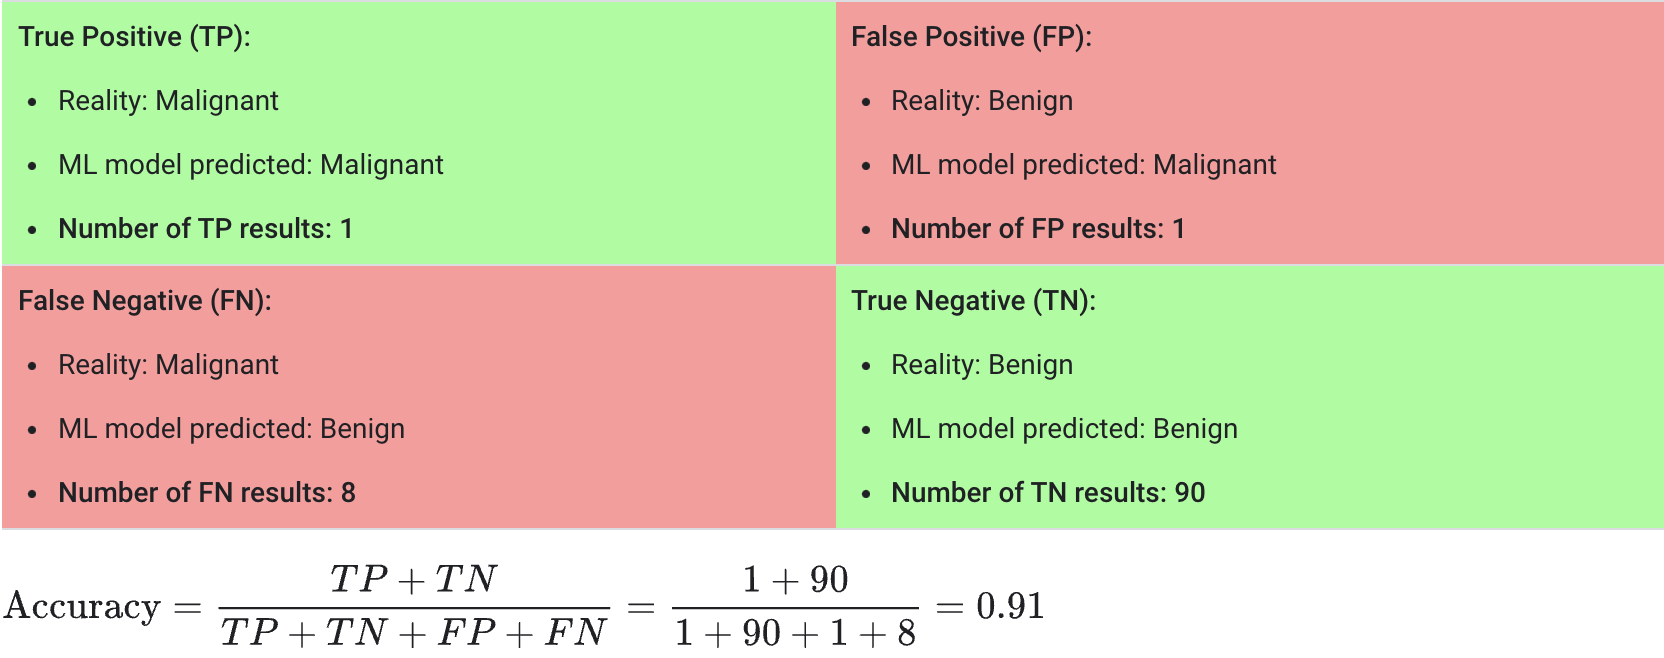

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

In [ ]:
model.predict_proba(X_test)[0:10]

In [ ]:
# Actual Data
y_test[0:10]

In [ ]:
y_probability = model.predict_proba(X_test)
y_probability = y_probability[:,1]
y_probability[0:10]

### ROC (Receiver Operating Characteristic) & AUC (Area Under the Curve)

In [ ]:
# threshold değeri kullanma

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data['target'] = wine.target

wine_data

In [ ]:
wine_data.info()

In [ ]:
wine_data.nunique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.scatterplot(x='color_intensity', y='alcohol', hue='target', data=wine_data);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

In [ ]:
np.arange(1, 25)

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_tuning = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn_tuning, param_grid, cv=5)
knn_gs.fit(X_train,y_train)

In [ ]:
print("best parameter:",knn_gs.best_params_)
print("The mean accuracy of the scores:",knn_gs.best_score_)

# Support Vector Machine 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

iris_data.head(100)

In [ ]:
iris_data.shape

In [ ]:
X = iris.data
y = iris.target
print(y)
print(iris.target_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

In [ ]:
svm_predictions

In [ ]:
accuracy = svm_model_linear.score(X_test, y_test)
accuracy

## Gerçek Hayat Projesi

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

X , y = load_breast_cancer(return_X_y=True)
df = pd.DataFrame(X, columns=load_breast_cancer().feature_names)

df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.distplot(df["mean area"])

In [ ]:
# Outlier Detection - 3 sigma
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
z

In [ ]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

In [ ]:
new_df = df.drop(outliers, axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]

In [ ]:
#Scaling
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_new)
X_scaled

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3)

model = LogisticRegression()
cv = cross_validate(model, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)
print(cv["test_score"])

In [ ]:
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test, y_test)))

In [ ]:
cv['test_score'].mean()

In [ ]:
best_estimator_index = np.argmax(cv["test_score"])
best_estimator_model = cv["estimator"][best_estimator_index]

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pred = best_estimator_model.predict(X_test)
cm = confusion_matrix(y_test, pred)

#visualization
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
sns.set(font_scale=3.4)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels', fontsize = 12)
ax.set_ylabel('True Labels', fontsize = 12)
plt.show()

In [ ]:
target_names = load_breast_cancer().target_names
custom_prediction_index = int(input("Tahmin etmek istediğiniz değerin indexini girin: "))

custom_prediction = best_estimator_model.predict([X_test[custom_prediction_index]])
real_idx = y_test[custom_prediction_index]
print()
print("Estimated value:", target_names[custom_prediction][0])
print("Real value:", target_names[real_idx])